In [29]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [30]:
dt=tree.DecisionTreeClassifier()
model=RandomForestClassifier(n_estimators=22)

In [31]:
df=pd.read_csv('C:/Users/akshason/Desktop/hiring.csv')

In [32]:
df.drop(['PassengerId','Name','SibSp','Parch','Cabin','Embarked','Ticket'],axis=1,inplace=True)

In [33]:
df.head()
df['Sex']=pd.get_dummies(df['Sex'])
df.fillna(df.Age.median(),inplace=True)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X=df[['Pclass','Sex','Age','Fare']]

In [36]:
Y=df['Survived']

In [37]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.3)

In [38]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=22)

In [49]:
y_pred=model.predict(X_test)

In [40]:
model.score(X_test,y_test)

0.8246268656716418

In [53]:
rf_score=np.mean(y_pred!=y_test)
rf_score

0.17537313432835822

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [57]:
gt=GradientBoostingClassifier(max_depth=3,learning_rate=1,n_estimators=300)

In [58]:
model=gt.fit(X_train,y_train)

In [61]:
r2_score(y_pred,y_test)

0.19524661385126485

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn=KNeighborsClassifier(n_neighbors=2)

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [44]:
knn.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [45]:
knn.score(X_test,y_test)

0.7238805970149254

In [46]:
import numpy as np
x=knn.predict(X_test)
from sklearn.model_selection import cross_val_score
score_c=cross_val_score(knn,X,Y,cv=10,scoring='neg_mean_squared_error')
score_c.mean()

-0.3052059925093633

In [48]:
np.mean(knn.predict(X_test)!=y_test)

0.27611940298507465

In [20]:
err_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    x=knn.predict(X_test)
    err_rate.append(np.mean(x!=y_test))

In [21]:
import seaborn as sns

In [30]:
import matplotlib.pyplot as plt
eff_rate=np.array(err_rate)
eff_rate=1-eff_rate

NameError: name 'err_rate' is not defined

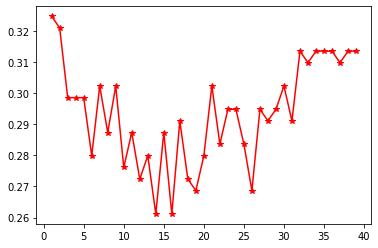

In [528]:
plt.plot(range(1,40),err_rate,marker='*',color='red')

In [82]:
plt.plot(range(1,40),eff_rate,marker='^',color='blue')

NameError: name 'eff_rate' is not defined

In [580]:
from sklearn.model_selection import cross_val_score
accuracy=[]
for i in range(2,40):
    model=RandomForestClassifier(n_estimators=22)
    c_score=cross_val_score(model,X,Y,cv=i)
    accuracy.append(c_score.mean())

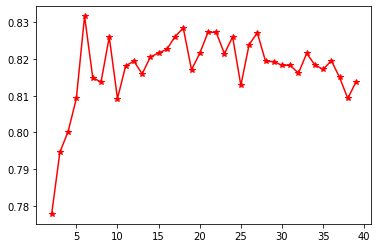

In [581]:
plt.plot(range(2,40),accuracy,marker='*',color='red')

In [608]:
c_score=cross_val_score(model,X,Y,cv=10)
c_score.mean()

0.8126092384519351

In [537]:
err_rate1=[]
for i in range(1,40):
    r=RandomForestClassifier(n_estimators=i)
    r.fit(X_train,y_train)
    x=r.predict(X_test)
    err_rate1.append(np.mean(x!=y_test))

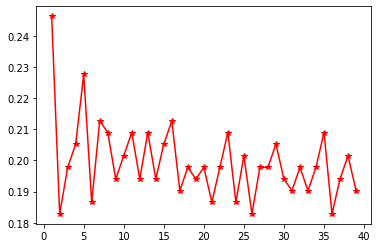

In [411]:
plt.plot(range(1,40),err_rate1,marker='*',color='red')

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
kmm=KMeans()
knn=KNeighborsClassifier()
score_kmm=cross_val_score(kmm,X,Y,cv=10,scoring='accuracy')
score_knn=cross_val_score(knn,X,Y,cv=10,scoring='accuracy')
score_nb=cross_val_score(nb,X,Y,cv=10,scoring='accuracy')
score_kmm.mean()
score_knn.mean()
score_nb.mean()

0.7766666666666666

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
import numpy as np
scc=[]
for i in range(1,40):
    kmm=KMeans(n_clusters=i)
    score=cross_val_score(kmm,X,Y,cv=10,scoring='accuracy')
    scc.append(score.mean())
scc=np.array(scc)
scc.min()

0.03591760299625468

In [44]:
from sklearn.naive_bayes import GaussianNB

In [59]:
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [66]:
nb.score(X_test,y_test)

0.7425373134328358

In [61]:
score_nb=cross_val_score(nb,X,Y,cv=10,scoring='accuracy')

In [71]:
score_nb.mean()

0.7766666666666666